<a href="https://colab.research.google.com/github/zyavuz610/logic_design_inKTU/blob/master/1_computer_org_lab/adc/adc_uygulamalari_(Bilg_Org_Lab_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analog-Dijital Dönüştürücü
* Neden ADC?
* ADC nerede kullanılır?
* ADC dönüştürme yöntemleri (deneyde?)
* Şekil 2'de bir çelişki var mı_
* Şekil 2'nin girişi, çıkışı?
* Şekil 2'ye göre ADC nasıl çalışır?

![ADC](https://github.com/zyavuz610/logic_design_inKTU/blob/master/1_computer_org_lab/adc/8bit_adc_block_diagram.png?raw=true) ![Sekil 2](https://github.com/zyavuz610/logic_design_inKTU/blob/master/1_computer_org_lab/adc/adc_sekil2.PNG?raw=true)


## Örnekleme

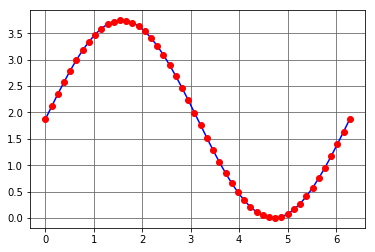

In [0]:
# ÖRNEKLEME
import numpy as np
import matplotlib.pyplot as plt

sf = 50                 # kaç örnek alınacak

pi_n = 1                # grafikteki pi sayısı
A    = 1                # grafiğin dikey öteleme miktarı
Gmin = 0               # grafiğin min değeri    
Glen = 3.75             # grafiğin dikey büyüklüğü
Gmax = Gmin + Glen
scale = Glen/2.      # ölçekleme parametresi

x   = np.linspace(0,pi_n*2*np.pi,1000)
y   = scale * (np.sin(x) + A) + Gmin
x2  = np.linspace(0,pi_n*2*np.pi,sf)
y2  = scale * (np.sin(x2) + A) + Gmin
plt.plot(x,y,"b-",x2,y2,"ro")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

## Kuantalama
* önce örneklemeyi çalıştırın!
* daha sonra quantalamayı çalıştırın

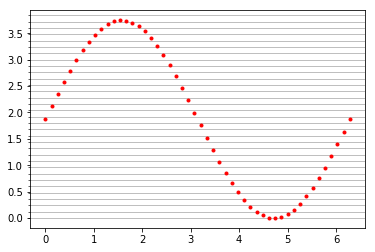

In [0]:
# quantalama
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rn = 2
n = 5           # çözünürlük
q = round((Gmax-Gmin)/(2**n - 1),rn) 

minor_ticks = np.arange(Gmin, Gmax+1, q)

ax.set_yticks(minor_ticks, minor=True)

# a corresponding grid
ax.grid(which='minor')


x2  = np.linspace(0,pi_n*2*np.pi,sf)
y2  = scale * (np.sin(x2) + A) + Gmin
plt.plot(x2,y2,"r.")
plt.show()

Vmin	-5.0
Vmax	5.0
n	6
q	0.1587


Va	SB	Vd	Vo
-----------------------------
1.7	000001	-4.8413	-6.5413
1.7	000010	-4.6826	-6.3826
1.7	000011	-4.5239	-6.2239
1.7	000100	-4.3652	-6.0652
1.7	000101	-4.2065	-5.9065
1.7	000110	-4.0478	-5.7478
1.7	000111	-3.8891	-5.5891
1.7	001000	-3.7304	-5.4304
1.7	001001	-3.5717	-5.2717
1.7	001010	-3.413	-5.113
1.7	001011	-3.2543	-4.9543
1.7	001100	-3.0956	-4.7956
1.7	001101	-2.9369	-4.6369
1.7	001110	-2.7782	-4.4782
1.7	001111	-2.6195	-4.3195
1.7	010000	-2.4608	-4.1608
1.7	010001	-2.3021	-4.0021
1.7	010010	-2.1434	-3.8434
1.7	010011	-1.9847	-3.6847
1.7	010100	-1.826	-3.526
1.7	010101	-1.6673	-3.3673
1.7	010110	-1.5086	-3.2086
1.7	010111	-1.3499	-3.0499
1.7	011000	-1.1912	-2.8912
1.7	011001	-1.0325	-2.7325
1.7	011010	-0.8738	-2.5738
1.7	011011	-0.7151	-2.4151
1.7	011100	-0.5564	-2.2564
1.7	011101	-0.3977	-2.0977
1.7	011110	-0.239	-1.939
1.7	011111	-0.0803	-1.7803
1.7	100000	0.0784	-1.6216
1.7	100001	0.2371	-1.4629
1.7	100010	0.3958	-1.3042
1.7	100011	0.55

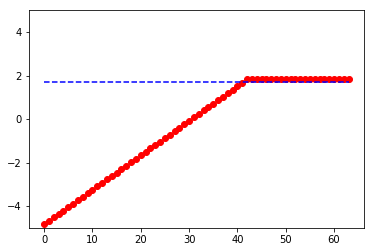

In [0]:
# rampa yöntemi
import numpy as np
import matplotlib.pyplot as plt

def mybin(num,n):
    s = ""
    while num > 0:
        m = num % 2
        num = num //2
        s = str(m) + s
        n = n - 1
    while n > 0:
        s = "0" + s
        n = n - 1
    return s

######################################################
# PARAMETRELER
Vmin    = -5.0
Vmax    = 5.0
Va      = 1.7                           # giriş
n       = 6                             # çözünürlük
######################################################

Vo = -1.        # başlangıçta çıkış (-)
i = 1
rn = 4          # yuvarlatma basamak sayısı
                       
#######################################################
# q = quantum                      
q = round((Vmax-Vmin)/(2**n - 1),rn)          
####################################################### 

gr = 1
grRampVd = np.zeros(2**n)
grRampVa = np.zeros(2**n)

print("Vmin",Vmin,sep="\t")
print("Vmax",Vmax,sep="\t")
print("n",n,sep="\t")
print("q",q,sep="\t")
print("\n")
print("Va","SB","Vd","Vo",sep='\t')
print("-----------------------------")
while Vo < 0:
    Vd = round(i*q + Vmin,rn)
    Vo = round(Vd - Va,rn)
    grRampVa[i-1] = Va
    grRampVd[i-1] = Vd
    print(Va,mybin(i,n),Vd,Vo,sep='\t')
    i = i+1
for i in range(i-1,2**n):
    grRampVa[i] = Va
    grRampVd[i] = Vd

err = round(Va - Vd,rn+2)
print("Hata",err)

if gr == 1:
    axes = plt.gca()
    axes.set_ylim([Vmin,Vmax])
    plt.plot(grRampVd,'ro',grRampVa,'b--')

Vmin	-2.55
Vmax	2.55
n	9
q	0.01


Adım	Va	SB		HEX	Vd	Vo
---------------------------------------------------------
1	1.29	100000000	0x100	0.01	-1.28
2	1.29	110000000	0x180	1.29	0.0
3	1.29	111000000	0x1c0	1.93	0.64
4	1.29	110100000	0x1a0	1.61	0.32
5	1.29	110010000	0x190	1.45	0.16
6	1.29	110001000	0x188	1.37	0.08
7	1.29	110000100	0x184	1.33	0.04
8	1.29	110000010	0x182	1.31	0.02
9	1.29	110000001	0x181	1.3	0.01
Hata -0.01


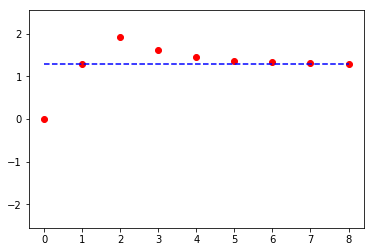

In [0]:
# ardışıl yaklaşım yöntemi
import numpy as np
import matplotlib.pyplot as plt

def mybin(num,n):
    s = ""
    while num > 0:
        m = num % 2
        num = num //2
        s = str(m) + s
        n = n - 1
    while n > 0:
        s = "0" + s
        n = n - 1
    return s

#####################################
# PARAMETRELER
Vmin    = -2.55
Vmax    = 2.55
Va      = 1.29        # giriş
n       = 9           # çözünürlük
#####################################

Vo = -1.        # başlangıçta çıkış (-)
rn = 4
i = n-1
                          
q = round((Vmax-Vmin)/(2**n - 1),rn)          # quantum

gr = 1
grRampVd = np.zeros(n)
grRampVa = np.zeros(n)

print("Vmin",Vmin,sep="\t")
print("Vmax",Vmax,sep="\t")
print("n",n,sep="\t")
print("q",q,sep="\t")
print("\n")
print("Adım","Va","SB","\tHEX","Vd","Vo",sep='\t')
print("---------------------------------------------------------")

base = 0
while i>=0:
    bias = 2**i
    Vd = round((base + bias) * q + Vmin,rn)
    Vo = round(Vd - Va,rn)

    grRampVa[n-i-1] = Va
    grRampVd[n-i-1] = Vd

    print(n-i,Va,mybin(base+bias,n),hex(base+bias),Vd,Vo,sep='\t')
    i = i - 1
    if Vo <= 0:
        base = base + bias

# son değerler
grRampVa[n-i-2] = Va
grRampVd[n-i-2] = Vd

err = round(Va - Vd,rn+2)
print("Hata",err)

if gr == 1:
    axes = plt.gca()
    axes.set_ylim([Vmin,Vmax])
    plt.plot(grRampVd,'ro',grRampVa,'b--')